In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wget import download
from os import path

# leemos los datos del archivo
dataset_compras = pd.read_csv("online_shoppers_intention.csv")
dataset_compras.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [51]:
dataset_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- administrative : numero de paginas de tipo administrativas que el usuario visito. bien guardado como int64.
- administrative_duration : tiempo en segundos que el usuario visito paginas administrativas.
- informational : numero de paginas de informacion que visito el usuario.
- informational_duration : tiempo en segundos del usuario en estas paginas.
- productRelated : numero de paginas relacionadas a producto que visito el usuario.
- productrelates_duration : tiempo en segundos que visito sobre paginas relacionadas a productos.
- bounceRates : porcentaje de visitantes que entraron al website y no hicieron ninguna solicitud mas al servidor.
- ExitRates : porcentaje de todas las visitas del sitio web que terminan en esa pagina especifica.
- PageValues : valor promedio de la pagina web, que un usuario visito antes de la transaccion con un e-commerce
- - una página con PageValues = 0 significa que:
    Las sesiones que visitaron esa página no terminaron en una compra, o
    La página no contribuyó directa o indirectamente a ninguna conversión.
- - Una página con PageValues > 0 (por ejemplo, 15.25) indica que, en promedio, cada visita a esa página estuvo asociada a $15.25 de ingresos generados en la misma sesión (aunque la compra pudo haber ocurrido en otra página posterior).
- SpecialDay : proximidad a un dia festivo. 0 es si esta muy cerca y se va alejando del 0 si se aleja del dia festivo.
- Month : mes de la visita registrado. guardado como String. FALTA EL MES DE ABRIL, VER Q HACER.
- OperatingSystems : sistema operativo que usa el usuario al momento de la visita. raro que este guardado con numero , no se entiende.
- Browser : navegador que se uso para la visita, tambien raro que este guardado como numero.
- Region : region registrada desde la cual se visito al sitio web, a que hacen referencia sus numeros?
- TrafficType : entero [1-20] que representa una categoria para el usuario sobre que tipo de trafico realiza.
- VisitorType : Me dice si es un visitor nuevo o reincidente, o otro. tres categorias bien marcadas. posible one-hot encoding.
- Weekend : booleano (dicotomica) que dice si se abrio al sitio web un fin de semana o no. ver si nos sirve pasar los booleanos a binario.
- Revenue : booleano (dicotomica) dice si realizo la compra o no.

In [55]:
dataset_compras["ProductRelated_Duration"].value_counts()



ProductRelated_Duration
0.000000        755
17.000000        21
11.000000        17
8.000000         17
15.000000        16
               ... 
4018.450000       1
262.900000        1
4627.489571       1
11431.001240      1
2773.500000       1
Name: count, Length: 9551, dtype: int64

### ojo con inconsistencias:
- si en la sesion no se visito ningun sitio de (product,admin,info) tampoco deberia haber registrado en la columna correspondiente a la duracion > 0.
### ojo con atributos categoricos puestos como numericos:
- OPERATINGSYSTEM
- BROWSER
- REGION
- TRAFFICTYPE


### Planteamos hipotesis univariadas, para ello comenzamos con un resumen estadistico de cada variable cuantitativa.



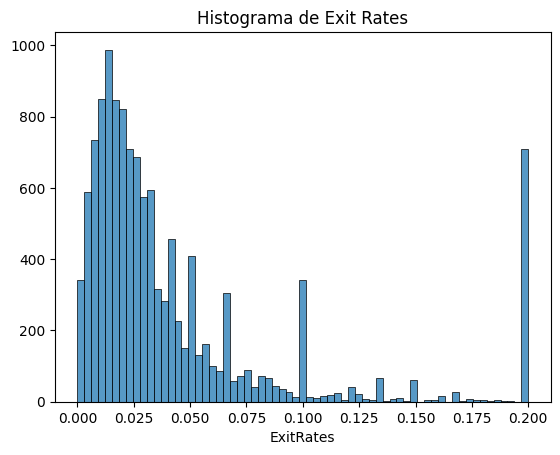

In [ ]:
import seaborn as sns

sns.histplot(x=dataset_compras["ExitRates"])
plt.title("Histograma de Exit Rates")
plt.ylabel("")
plt.show()

#### interpretando el histograma de ExitRates.
la interpretacion que sacamos de este histograma es que se concentran los datos extraidos entre el 0 y el 0.025, esto implicaria que:
las paginas por lo general conducen a mas navegacion y no terminan su estadia en el sitio alli.

por otro lado tambien observamos un pico en 0.200 lo que significa que existen paginas con una alta tasa de salida y existen al rededor de 700 
sesiones que visitan estas paginas.

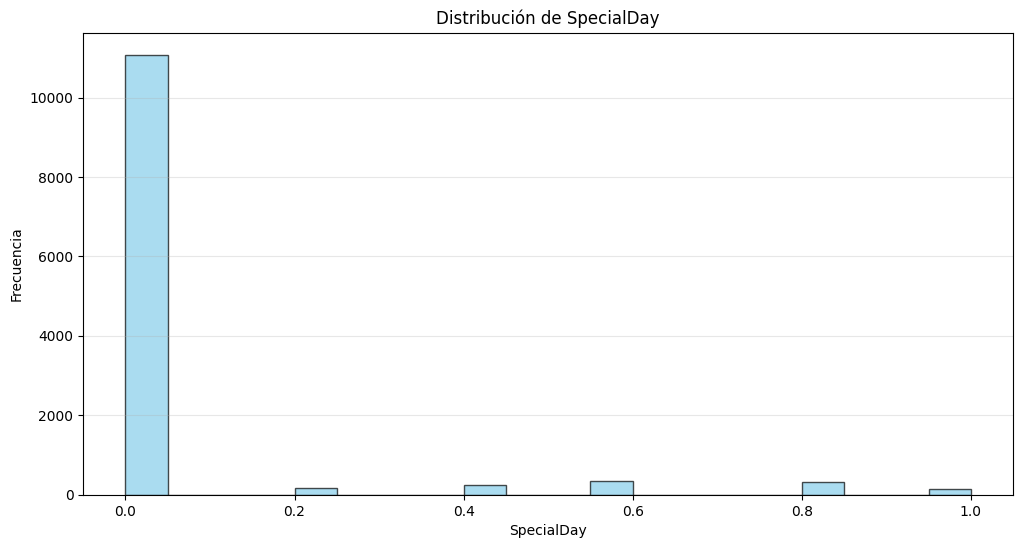

In [68]:
plt.figure(figsize=(12, 6))

# Histograma con escala logarítmica en el eje Y
plt.hist(dataset_compras["SpecialDay"], bins=20, alpha=0.7, color="skyblue", edgecolor="black")
plt.xlabel("SpecialDay")
plt.ylabel("Frecuencia")
plt.title("Distribución de SpecialDay")
plt.grid(axis="y", alpha=0.3)
plt.show()

#### interpretando el grafico de SpecialDay.
La inmensa mayoria de las sesiones, ocurren en un dia Festivo, o en un dia anterior o posterior al dia Festivo.
el analisis de los valores de esta variable SpecialDay lo obtuvimos al realizar un estudio del dominio y de quien extrajo los datos, por eso
concluimos que la distribucion esta sesgada a derecha...

In [ ]:

# Estadísticos de ProductRelated_Duration
pr_duration = dataset_compras["ProductRelated_Duration"]

print("Media:", pr_duration.mean())
print("Mediana:", pr_duration.median())
print("Desviación estándar:", pr_duration.std())
print("Mínimo:", pr_duration.min())
print("Máximo:", pr_duration.max())
print("Percentiles:")
print(pr_duration.quantile([0.25, 0.5, 0.75]))


Media: 1194.7462199688268
Mediana: 598.9369047499999
Desviación estándar: 1913.6692878720035
Mínimo: 0.0
Máximo: 63973.52223
Percentiles:
0.25     184.137500
0.50     598.936905
0.75    1464.157214
Name: ProductRelated_Duration, dtype: float64


### interpretando datos estadisticos de ProductRelated_Duration
Notamos por la distribucion de la variable que el 75% de las sesiones pasan 23 minutos o menos (1400 segundos aprox) en paginas web
relacionadas a producto

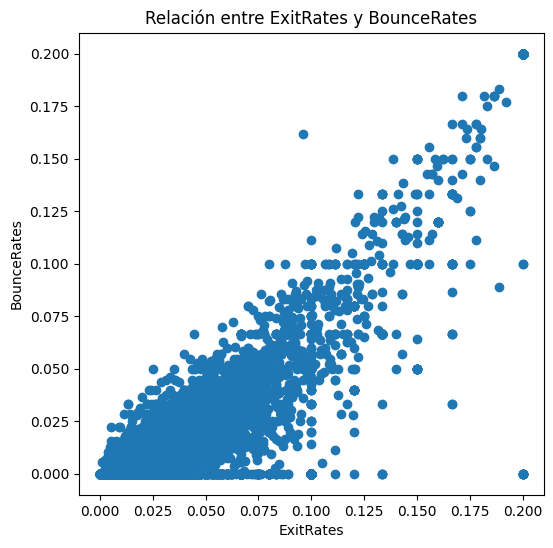

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(dataset_compras["ExitRates"], dataset_compras["BounceRates"])

# Agregar etiquetas a los ejes
plt.xlabel("ExitRates")
plt.ylabel("BounceRates")

# Agregar un título al gráfico
plt.title("Relación entre ExitRates y BounceRates")

# Mostrar el gráfico
plt.show()

#### interpretando el scatter-plot...
Notamos que existen muchas sesiones donde hay un bajo porcentaje de ExitRates (es decir que la sesion tiende a seguir activa en otras paginas adyacentes) y tambien un muy aproximado porcentaje de BounceRates(sesiones en las cuales no se finaliza en la primer pagina que se visito.)
La alta correlacion entre ambas variables nos informa una relacion casi lineal entre ellas. A medida de que el porcentaje de ExitRates aumenta, el BounceRate tambien lo hace.

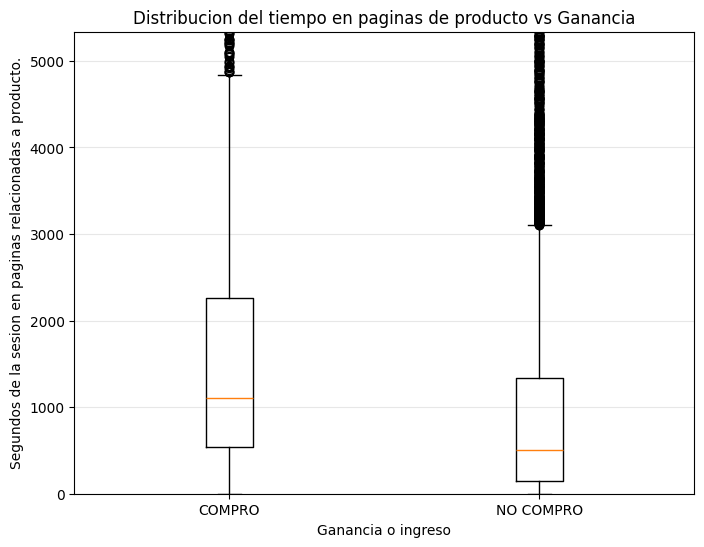

In [ ]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot( [dataset_compras[dataset_compras["Revenue"] == True]["ProductRelated_Duration"],
             dataset_compras[dataset_compras["Revenue"] == False]["ProductRelated_Duration"]],
             tick_labels=["COMPRO", "NO COMPRO"])

# Agregar etiquetas a los ejes
plt.xlabel("Realizo la compra?")
plt.ylabel("Segundos de la sesion en paginas relacionadas a producto.")

# Agregar un título al gráfico
plt.title("Distribucion del tiempo en paginas de producto vs Ganancia")

# Limitar el eje Y para enfocarse en las cajas (excluir outliers extremos)
Q1_compro = dataset_compras[dataset_compras["Revenue"] == True]["ProductRelated_Duration"].quantile(0.25)
Q3_compro = dataset_compras[dataset_compras["Revenue"] == True]["ProductRelated_Duration"].quantile(0.75)
IQR_compro = Q3_compro - Q1_compro

Q1_no_compro = dataset_compras[dataset_compras["Revenue"] == False]["ProductRelated_Duration"].quantile(0.25)
Q3_no_compro = dataset_compras[dataset_compras["Revenue"] == False]["ProductRelated_Duration"].quantile(0.75)
IQR_no_compro = Q3_no_compro - Q1_no_compro

# Tomar el máximo entre los dos límites superiores de las cajas
limite_superior = max(Q3_compro + 1.5 * IQR_compro, Q3_no_compro + 1.5 * IQR_no_compro)

plt.ylim(0, limite_superior * 1.1)
plt.grid(axis="y", alpha=0.3)
plt.show()


#### analizando el grafico de plots...
Pensamos que podrian estar relacionadas las variables ProductRelated_Duration y Revenue siguiendo la siguiente hipotesis:
A mayor tiempo de una sesion visitando una pagina relacionada a producto, mayor es la probabilidad de que se realice la compra y se obtenga una ganancia.